# GMT 492 MIDTERM TAKE-HOME EXAM


- You have 5 days to complete the tasks given here. (Due date: 02.12.2020 - 23:59)
- Please write your own codes and fill the blank fields only and upload only this file (.ipynb) with your answers through "evdekal" platform.
- Note: This data has never been tested before (even by myself) and probably you will be the first ones trying to fit statsmodels functions on it. Therefore, there is a probability you may get bad fits or inconsistent graphs. Do not worry.... just change the parameters after analyzing your data carefully and try to find the best fit for double and triple exponential smoothings.
- Points for each question will be determined later.
- Good Luck...

For this exam, you will use a Covid19 dataset and answer the questions below. The data is provided by the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE) and contains the number of reported daily cases by country. The dataset is available on GitHub and is updated regularly.

We’re going to take the Time Series data only for confirmed daily cases.
url="https://raw.githubusercontent.com/GeoTurkey/GMT_COURSES/main/Covid19_daily_cases.csv"

**Import any necessary libraries to load, plot and analyse our data.**

In [1]:
import pandas as pd
import numpy as np

import datetime
import calendar
import seaborn as sns
from datetime import datetime as dt

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

%matplotlib inline

ModuleNotFoundError: No module named 'seaborn'

**Read in the data from the URL. Show the first 15 rows of the data** 

In [2]:
url="https://raw.githubusercontent.com/GeoTurkey/GMT_COURSES/main/Covid19_daily_cases.csv"
db=pd.read_csv(url, sep=',', usecols=('date','case'), parse_dates=['date']) 
print(db.head(15))

         date  case
0  2020-01-22   555
1  2020-01-23    99
2  2020-01-24   287
3  2020-01-25   493
4  2020-01-26   684
5  2020-01-27   809
6  2020-01-28  2651
7  2020-01-29   589
8  2020-01-30  2068
9  2020-01-31  1692
10 2020-02-01  2111
11 2020-02-02  4749
12 2020-02-03  3100
13 2020-02-04  4011
14 2020-02-05  3745


### 1. What is the current data type of the Date column?


In [7]:
# ATTENTION READ THE COMMENT PLEASE
#Normally It was a object but I used parse_dates=['date'] in csv read so it turn to datetime64 automaticly.
print(db['date'].dtype)

datetime64[ns]


### 2. Change the Date column to a datetime format

In [8]:
db['date']=pd.to_datetime(db['date'])
print(db['date'].dtype)                             

datetime64[ns]


### 3. Set the Date column to be the new index

In [9]:
db.set_index('date')
print(db)

          date    case
0   2020-01-22     555
1   2020-01-23      99
2   2020-01-24     287
3   2020-01-25     493
4   2020-01-26     684
..         ...     ...
303 2020-11-20  666146
304 2020-11-21  586304
305 2020-11-22  483799
306 2020-11-23  521709
307 2020-11-24  588416

[308 rows x 2 columns]


### 4. Plot the DataFrame with a simple line plot - choose a reasonable figure size. What do you notice about the plot?

Text(0.5, 0, 'date')

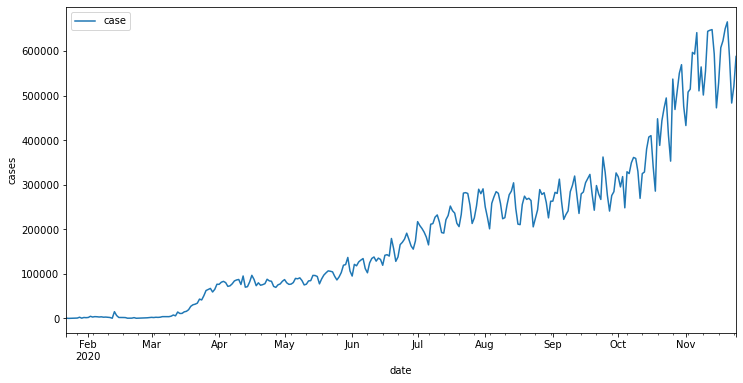

In [10]:
ax=db.plot(x='date',y='case',figsize=(12,6))
ax.set_ylabel('cases')
ax.set_xlabel('date')



### 5. Add a column called 'Month' that takes the month value from the index



In [11]:
db['Month'] = pd.DatetimeIndex(db['date']).month
print(db['Month'].dtype)
print(db)

int64
          date    case  Month
0   2020-01-22     555      1
1   2020-01-23      99      1
2   2020-01-24     287      1
3   2020-01-25     493      1
4   2020-01-26     684      1
..         ...     ...    ...
303 2020-11-20  666146     11
304 2020-11-21  586304     11
305 2020-11-22  483799     11
306 2020-11-23  521709     11
307 2020-11-24  588416     11

[308 rows x 3 columns]


#### See if you can obtain the <em>name</em> of the month (Jan, Feb, ...) instead of a number!</strong>

In [12]:

db['Month'] = db['Month'].apply(lambda x: calendar.month_abbr[x])
print(db['Month'])

0      Jan
1      Jan
2      Jan
3      Jan
4      Jan
      ... 
303    Nov
304    Nov
305    Nov
306    Nov
307    Nov
Name: Month, Length: 308, dtype: object


### 6. Create a BoxPlot that groups by the Month field

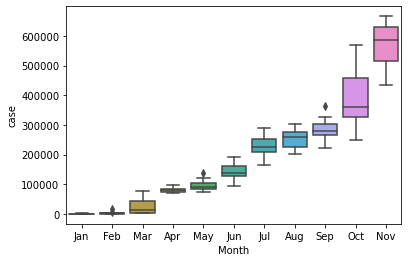

In [13]:
sns.boxplot(x='Month',y='case',data=db)


### 7. **What was the percent increase from May 1st 2020 to Sep 1st 2020 ?**


In [14]:
#db2 has index_col attribute for detecting '2020-05-01' type date format
db2=pd.read_csv(url, sep=',', usecols=('date','case'), parse_dates=['date'],index_col='date') 

may1=db2['case'].loc['2020-05-01']
print('first value is' , may1)

sep1=db2['case'].loc['2020-09-01']
print('last value is' , sep1)

sonuc=(sep1/may1)*100
print('result is %' ,sonuc) #301'lik bir artış.

first value is 87237
last value is 263446
result is % 301.98883501266664


### 8. **What is the day with the least value in June 2020 ?**

In [15]:

haziran=db2.loc['2020-06-01':'2020-06-30']
print(haziran.index.min())

2020-06-01 00:00:00


### 9. **What 5 days have the highest value? (please order them)**

In [16]:
db.nlargest(5, ['case']) 

,date,case,Month
303,2020-11-20,666146,Nov
302,2020-11-19,650567,Nov
296,2020-11-13,648785,Nov
295,2020-11-12,647297,Nov
294,2020-11-11,644986,Nov


### 10. Create a bar plot showing the monthly averages

                     case
date                     
2020-01-31     992.700000
2020-02-29    2623.689655
2020-03-31   25481.096774
2020-04-30   79924.866667
2020-05-31   93840.741935
2020-06-30  141983.500000
2020-07-31  230451.290323
2020-08-31  254353.193548
2020-09-30  282890.100000
2020-10-31  390728.354839
2020-11-30  570376.291667


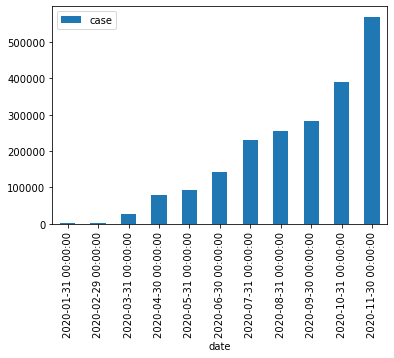

In [17]:
avg=db2.resample('M').mean()
print(avg)

avg.plot.bar( y='case')

### 11. Plot out the monthly rolling mean on top of the original data. hint: (1 month:30 days)

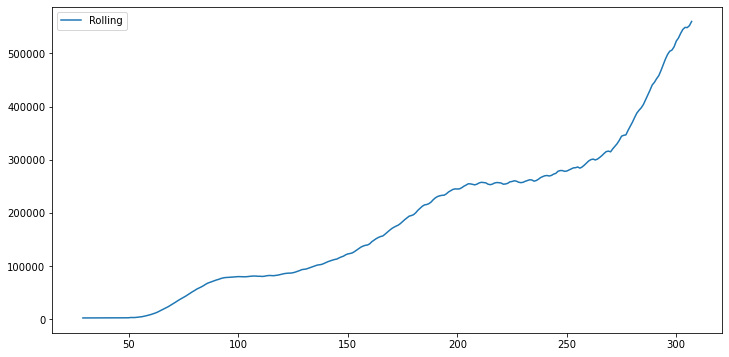

In [18]:
db['Rolling']=db['case'].rolling(window=30).mean()
db.plot(y='Rolling',figsize=(12,6))

### 12. Assign a frequency of "Calendar Day" to the DatetimeIndex.
<br>A full list of time series offset aliases can be found <a href='http://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases'>here</a>.

In [22]:
db2.index.freq='D'
db2.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2020-11-15', '2020-11-16', '2020-11-17', '2020-11-18',
               '2020-11-19', '2020-11-20', '2020-11-21', '2020-11-22',
               '2020-11-23', '2020-11-24'],
              dtype='datetime64[ns]', name='date', length=308, freq='D')

### 13. Perform a Seasonal Decomposition on your data in order to isolate individual components such as error, trend, and seasonality (ETS). Plot the results 

In [23]:
result=seasonal_decompose(db2['case'],model='multiplicative')
print(result.resid)
print(result.trend)
print(result.seasonal)




date
2020-01-22         NaN
2020-01-23         NaN
2020-01-24         NaN
2020-01-25    0.611638
2020-01-26    0.953282
                ...   
2020-11-20    1.024634
2020-11-21    0.984663
2020-11-22         NaN
2020-11-23         NaN
2020-11-24         NaN
Freq: D, Name: resid, Length: 308, dtype: float64
date
2020-01-22              NaN
2020-01-23              NaN
2020-01-24              NaN
2020-01-25       796.857143
2020-01-26       801.714286
                  ...      
2020-11-20    591471.000000
2020-11-21    588658.714286
2020-11-22              NaN
2020-11-23              NaN
2020-11-24              NaN
Freq: D, Name: trend, Length: 308, dtype: float64
date
2020-01-22    0.986820
2020-01-23    1.115828
2020-01-24    1.099176
2020-01-25    1.011514
2020-01-26    0.894984
                ...   
2020-11-20    1.099176
2020-11-21    1.011514
2020-11-22    0.894984
2020-11-23    0.898140
2020-11-24    0.993538
Freq: D, Name: seasonal, Length: 308, dtype: float64


### 14. Add a column that shows a 14-day Simple Moving Average (SMA). Plot the result.

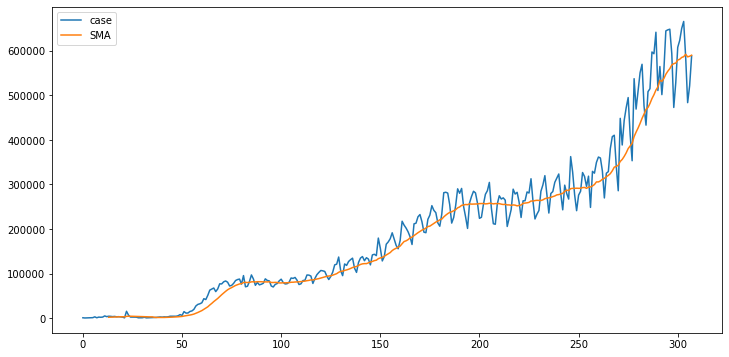

In [24]:
db['SMA']=db['case'].rolling(window=14).mean()
db.plot(y=['case','SMA'],figsize=(12,6))

### In order to answer the following questions you have to analyze your data really carefull and find if there exist and trend, seasonality and etc...

### 15. Add a column that shows an Exponentially Weighted Moving Average (EWMA) with a suitable span (i.e., you have to decide about the best value of span) using the statsmodels <tt>SimpleExpSmoothing</tt> function. Plot the result 

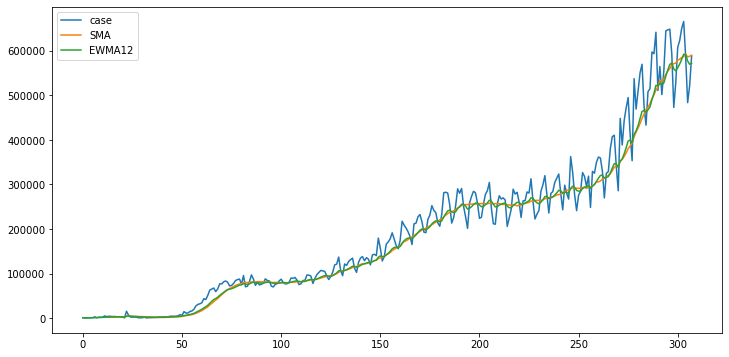

In [25]:
span = 14 # I tried 7,14,30 span values. #30 is too far from orginal data and 7 is too close it. 14 is best fit for avarage ploting
alpha = 2/(span+1)
db['EWMA12'] = db['case'].ewm(alpha=alpha,adjust=False).mean()
db.plot(y=['case','SMA','EWMA12'],figsize=(12,6))

### 16. Add a column to the DataFrame that shows a Holt-Winters fitted model using Double Exponential Smoothing with multiplicative models. Plot the result

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


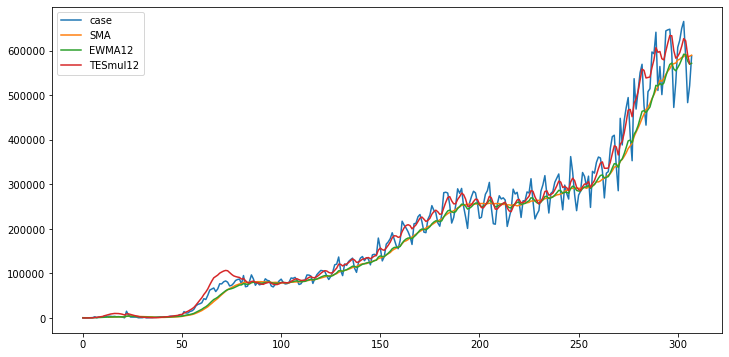

In [26]:
db['TESmul12'] = ExponentialSmoothing(db['case'], trend='mul').fit().fittedvalues.shift(-1)
db.plot(y=['case','SMA','EWMA12','TESmul12'],figsize=(12,6))

### 17. Add a column to the DataFrame that shows a Holt-Winters fitted model using Triple Exponential Smoothing with multiplicative models. Plot the result

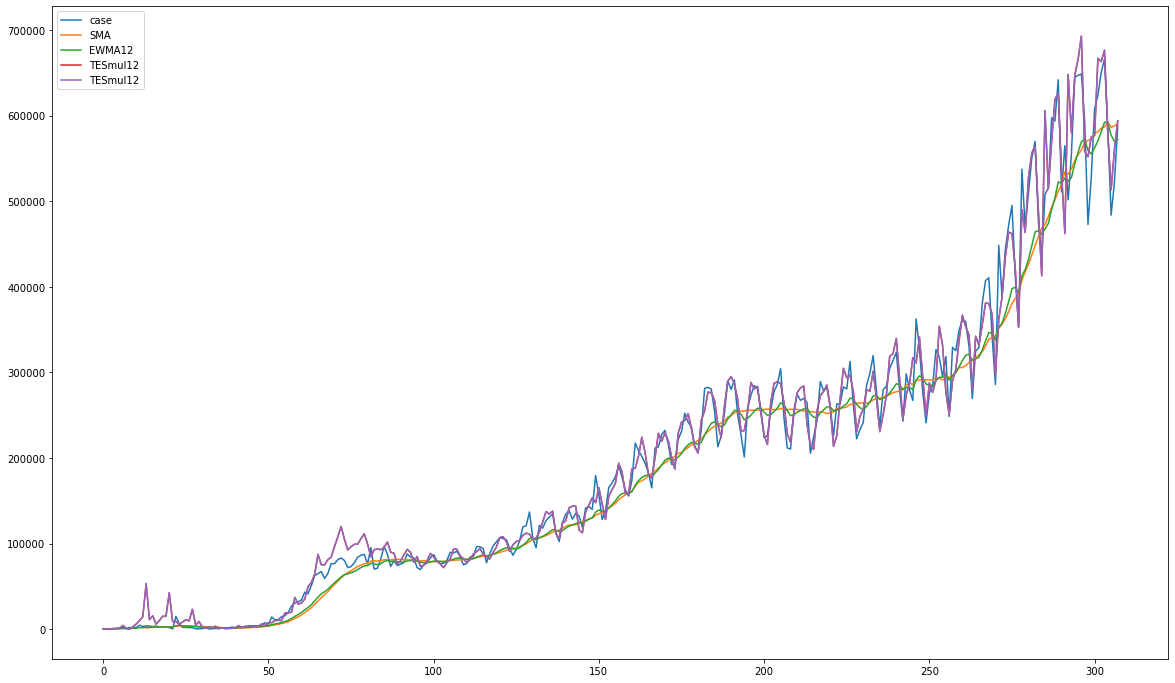

In [28]:
db['TESmul12'] = ExponentialSmoothing(db['case'],trend='mul',seasonal='mul',seasonal_periods=7).fit().fittedvalues
db.plot(y=['case','SMA','EWMA12','TESmul12','TESmul12'],figsize=(20,12))

### 18. Compare Triple Exponential Smoothing with multiplicative models against Triple Exponential Smoothing with additive models (season and trend = additive). Plot the result

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


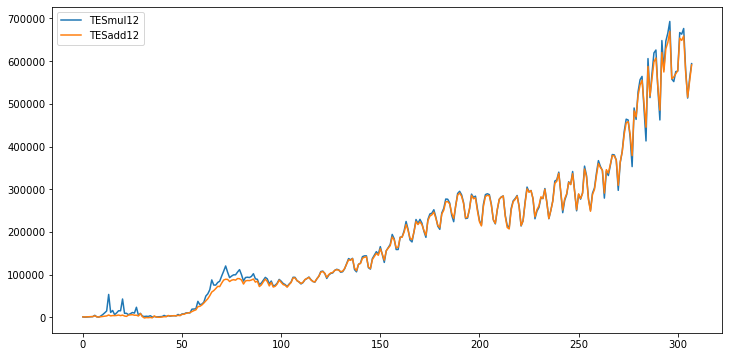

In [138]:
db['TESadd12'] = ExponentialSmoothing(db['case'],trend='add',seasonal='add',seasonal_periods=7).fit().fittedvalues

db.plot(y=['TESmul12','TESadd12'],figsize=(12,6))



### Thats all. 

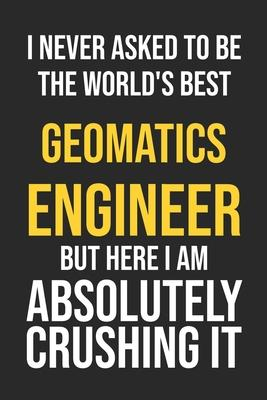